# Assignment Python 1

##### Nama : Syaima Radestya
##### Kode Peserta : PYTN-KS10-011
##### Program : Introduction to Python for Data Science

# Project Description
***

This project is the first assignment for independent study in my **Python class for Data Science** at PT Hacktivate Teknologi Indonesia. <br>
Students are asked to formulate a question, which is then answered by visualizing data and drawing informational conclusions. <br>
This project will analyze crime data in major metropolitan areas, such as London, based on distinct patterns. <br>
From January 2008 to December 2016, the number of criminal reports was broken down by month, LSOA borough, and major/minor category. <br>
*The data was taken from Kaggle.com.*

## 1. Import Libraries
***
Import required libraries (mengimport beberapa library yang dibutuhkan)

In [86]:
# library yang dibutuhkan
import numpy as np
import pandas as pd

# for plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# styling
mpl.style.use(['ggplot'])

# untuk membuat wordcloud
from wordcloud import WordCloud

# membuat maps
import folium
from folium import plugins

## 2. Membaca Dataset dan Preprocessing Dataset 
***
Sesi ini menjelaskan tentang pre-processing yang akan dilakukan pada dataset sebelum dilakukan visualisasi seperti rename, mengetahui dimensi pada dataset, mengetahui missing values, dan mengetahui tipe data setiap atribut apakah sudah sesuai apa belum

In [2]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA"]
# read dataset
df_lcd = pd.read_csv('london_crime_by_lsoa.csv',
                        na_values=missing_values)

In [3]:
df_lcd

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
# Ringkasan singkat dari setiap kolom dataset
df_lcd.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [5]:
# Mengetahui Dimensi Data
baris, kolom = df_lcd.shape
print(baris, " baris")
print(kolom, " kolom")

13490604  baris
7  kolom


In [6]:
# Melihat list index
df_lcd.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [7]:
# Mencoba mengetahui dataset yang memiliki value lebih dari 250
criminal_value = df_lcd[df_lcd['value'] > 250]
criminal_value

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
4458307,E01004734,Westminster,Theft and Handling,Other Theft,257,2011,11
7930489,E01004734,Westminster,Theft and Handling,Other Theft,254,2008,2
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
9164301,E01004734,Westminster,Theft and Handling,Other Theft,260,2009,3
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
11181489,E01004734,Westminster,Theft and Handling,Other Theft,253,2008,10
11201180,E01004734,Westminster,Theft and Handling,Other Theft,280,2009,12


### Mengubah Nama Kolom
Pada bagian ini, kita mengubah nama kolom agar terlihat lebih rapih dan sesuai dengan format penulisan judul

In [8]:
df_lcd = df_lcd.rename(columns=
                       {'lsoa_code' : 'LSOA Code',
                        'borough' : 'Borough',
                        'major_category' : 'Major Category',
                       'minor_category' : 'Minor Category',
                       'value' : 'Value',
                       'year' : 'Year',
                       'month' : 'Month'})

In [9]:
# Menampilkan daftar kolom yang ada dari dataset
columns = df_lcd.columns
print(columns)

Index(['LSOA Code', 'Borough', 'Major Category', 'Minor Category', 'Value',
       'Year', 'Month'],
      dtype='object')


In [10]:
# Melihat 10 item terakhir dataset
df_lcd.tail(10)

,LSOA Code,Borough,Major Category,Minor Category,Value,Year,Month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


### Mengetahui Jumlah Missing Values
Pada sesi ini kita dapat mengetahui missing values yang dapat dideteksi Pandas. Kita juga mengetahui unexpected missing values yaitu apakah tipe data sudah sesuai atau belum

In [11]:
for col in columns:
    print('Standard Missing Values Pada Kolom {} berjumlah {}'.format(
        col, df_lcd[col].isnull().sum()))

Standard Missing Values Pada Kolom LSOA Code berjumlah 0
Standard Missing Values Pada Kolom Borough berjumlah 0
Standard Missing Values Pada Kolom Major Category berjumlah 0
Standard Missing Values Pada Kolom Minor Category berjumlah 0
Standard Missing Values Pada Kolom Value berjumlah 0
Standard Missing Values Pada Kolom Year berjumlah 0
Standard Missing Values Pada Kolom Month berjumlah 0


In [12]:
# Mengetahui info pada data
df_lcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   LSOA Code       object
 1   Borough         object
 2   Major Category  object
 3   Minor Category  object
 4   Value           int64 
 5   Year            int64 
 6   Month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [13]:
# Mengetahui nilai unik pada kolom untuk menentukan data dengan tipe anomali
# LSOA Code tidak diperiksa karena data tersebut tidak terlalu dibutuhkan
str_columns = ['Borough', 'Major Category', 'Minor Category']
for string_col in str_columns:
    print('Nilai Unique Untuk Kolom ', string_col)
    print(df_lcd[string_col].unique())
    print("="*75)

Nilai Unique Untuk Kolom  Borough
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
Nilai Unique Untuk Kolom  Major Category
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
Nilai Unique Untuk Kolom  Minor Category
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'

In [14]:
# Nilai unik untuk kolom Value, Year, dan Month
int_columns = ['Value', 'Year', 'Month']

for int_col in int_columns:
    print('Nilai Unique Untuk Kolom', int_col)
    print(df_lcd[int_col].unique())
    print("="*75)

Nilai Unique Untuk Kolom Value
[  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 190 286 258

In [15]:
# Total Missing Values
print("Total dari keseluruhan missing values = ",
      df_lcd.isnull().sum().sum())

Total dari keseluruhan missing values =  0


## ANALYSIS
***
Pada *London Crime Data* tahun 2008-2016, data tersebut memiliki total 13490604 baris dan 7 kolom. Data tersebut memiliki dua tipe data utama yang digunakan untuk beberapa kolom, yaitu string dan integer. Lalu, berdasarkan hasil pengujian nilai unik untuk setiap kolom bertipe string dan setiap kolom bertipe integer, semua nilai unik yang terdeteksi sudah terisi dengan nilai yang sesuai dan tidak ditemukan anomali tipe data pada setiap kolom tersebut. **Jadi, pada tahap pre-processing tidak ditemukan adanya nilai null pada dataframe**

## 3. Visualisasi Data
Menyiapkan variabel terlebih dahulu yang nantinya akan diperlukan 
***
**borough_reg** : the london borough for which the statistic is related <br>
**years** : the year of the summary statistic (2008 - 2016) <br>
**color_list** : menampung List dari matplotlib colors untuk keperluan plotting <br>
**minor_ctg** : menampung List dari Kejahatan Minor (Minor Category) <br>

In [17]:
# Menyiapkan list 'Borough' untuk keperluan data wilayah
borough_reg = list(df_lcd['Borough'].unique())

# Menyiapkan list 'Year' untuk keperluan berikutnya
years = list(map(int,np.sort(df_lcd['Year'].unique())))

# Menyiapkan list warna untuk visualisasi grafik
color_list = ['tomato', 'gray', 'plum', 'forestgreen', 'cornflowerblue', 
              'honeydew', 'salmon', 'lavender', 'sienna', 'darkslateblue']

# menyiapkan list 'Minor Category' untuk keperluan berikutnya
minor_ctg = list(df_lcd['Minor Category'].unique())


### a) Area Plot
***
Pertama-tama kita membuat dataframe baru untuk membuat visualisasi menggunakan area plot dengan melihat total kasus kejahatan pada setiap wilayah tiap tahun <br> <br>
**Struktur dataframe ini yaitu:** <br>
*Index* diisi dengan kategori wilayah <br>
*Columns* diisi dengan rentang tahun dari 2008 - 2016. <br>
*Value* adalah penjumlah total kasus kejahatan untuk axis=1

In [87]:
data = {}
for year in years:
    # Ambil semua data pada tiap tahun dan grouping berdasarkan borough
    wilayah_pertahun = df_lcd[
        df_lcd['Year'] == year].groupby('Borough')['Value'].sum()
    
    # Menyiapkan Series untuk keperluan dataframe
    data[year] = pd.Series(data=map(int, wilayah_pertahun.reset_index()[
        'Value'].values),index=wilayah_pertahun.index)

# Membuat dataframe dengan 'Borough' sebagai index dan years sebagai columns
df_wilayah_pertahun = pd.DataFrame(
    columns=years,
    index=borough_reg,
    data=data)

df_wilayah_pertahun['Value'] = df_wilayah_pertahun[years].sum(axis=1)

# Urutkan data berdasarkan Total dari tertinggi ke terendah
df_wilayah_pertahun.sort_values(by='Value', ascending=False, inplace=True)

In [88]:
# Menampilkan 10 Data Teratas
df_wilayah_pertahun.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Value
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551


##### **Question:**
Wilayah apa yang memiliki total kasus kejahatan paling tinggi dari tahun 2008-2016?

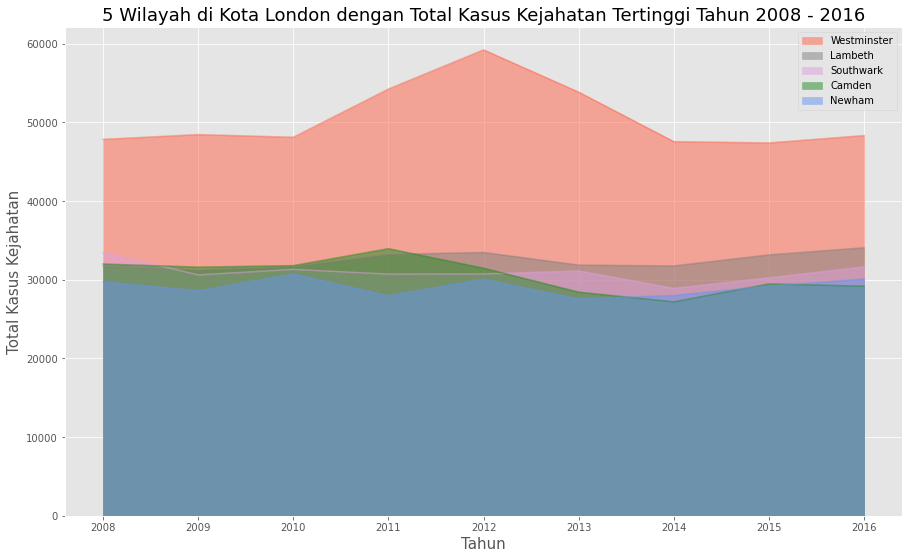

In [96]:
df_wilayah_pertahun[years].head().transpose().plot(
    kind='area',
    stacked=False,
    figsize=(15,9),
    color=color_list);
plt.title("5 Wilayah di Kota London dengan Total Kasus Kejahatan Tertinggi Tahun 2008 - 2016", fontsize=18, y=1)
plt.ylabel("Total Kasus Kejahatan", fontsize=15);
plt.xlabel("Tahun", fontsize=15);

**Kesimpulan:** berdasarkan hasil dari visualisasi data menggunakan area plot, dapat diketahui bahwa *Westminster menjadi wilayah dengan total kasus kejahatan tertinggi* dari tahun 2008 - 2016. Puncaknya yaitu pada tahun 2012, total kasus kejahatannya hampir menyentuh angka 60.000 pada wilayah Westminster. Selisihnya dengan keempat wilayah lainnya juga relatif cukup jauh rentangnya yaitu pada wilayah Lambeth, Southwark, Camden, dan Newham.

### b) Histogram
***
Pada bagian ini, saya akan membuat visualisasi data menggunakan histogram yaitu representasi grafis dari tabulasi frekuensi yang digambarkan dengan grafis batangan

In [21]:
df_2015 = df_wilayah_pertahun[2015]

In [22]:
count, bin_edges = np.histogram(df_2015, bins=10)
print(count)
print(bin_edges)

[ 1  0  6  3 10  8  4  0  0  1]
[  151.   4875.4  9599.8 14324.2 19048.6 23773.  28497.4 33221.8 37946.2
 42670.6 47395. ]


In [23]:
df_2015

Westminster               47395
Lambeth                   33164
Southwark                 30260
Camden                    29477
Newham                    29217
Croydon                   28089
Ealing                    26247
Islington                 27032
Tower Hamlets             27493
Brent                     24883
Hackney                   26941
Lewisham                  23437
Haringey                  24626
Barnet                    24036
Hillingdon                23234
Wandsworth                22401
Waltham Forest            20969
Enfield                   22076
Hounslow                  21286
Hammersmith and Fulham    19848
Bromley                   20637
Redbridge                 18897
Greenwich                 20929
Kensington and Chelsea    19070
Barking and Dagenham      16346
Havering                  15870
Harrow                    12601
Merton                    12273
Bexley                    11990
Sutton                    10598
Richmond upon Thames      10413
Kingston

##### **Question:**
Berapa kisaran kasus kejahatan di sebagian besar wilayah London pada tahun 2015?

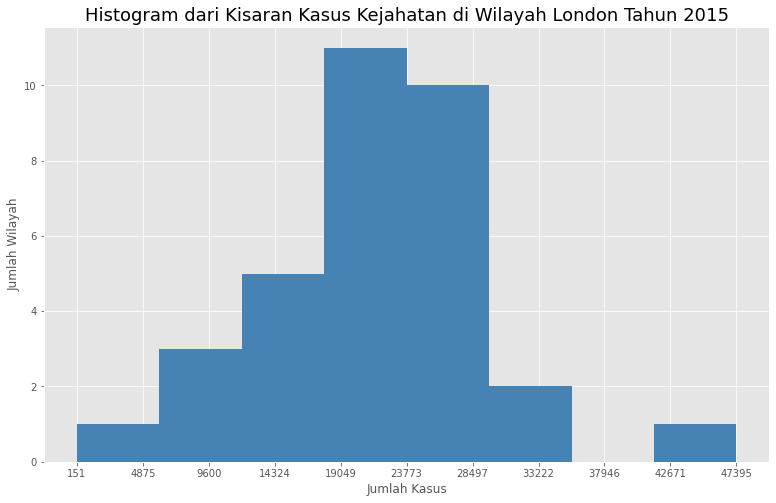

In [95]:
df_2015.plot(kind='hist',
             xticks=bin_edges,
             bins=8,
             figsize=(13,8),
             color='steelblue');
plt.title("Histogram dari Kisaran Kasus Kejahatan di Wilayah London Tahun 2015", fontsize=18);
plt.xlabel("Jumlah Kasus");
plt.ylabel("Jumlah Wilayah");
plt.show()

**Kesimpulan:** Berdasarkan visualisasi histogram diatas, maka dapat kita ketahui bahwa kasus kejahatan dengan jumlah wilayah yang paling tinggi pada tahun 2015 berada di jumlah **kisaran 19.049 - 23.773** yang dimana terjadi pada lebih dari 10 jumlah wilayah di London. Jumlah kasus paling sedikit pada tahun 2015 memiliki total **151 kasus**, dan jumlah kasus terbesar pada tahun 2015 yaitu dengan total **47.395 kasus**.

### c) Bar Chart
***
Pada sesi ini saya akan membuat visualisasi menggunakan bar charts yang ditampilkan berupa grafik dengan bentuk diagram batang. Pertama-tama kita membuat dataframe baru untuk membuat visualisasi menggunakan Bar Chart dengan melihat total kasus kejahatan untuk Minor Category tiap tahun <br> <br>
**Struktur dataframe ini yaitu:** <br>
*Index* diisi dengan kategori kejahatan minor <br>
*Columns* diisi dengan rentang tahun dari 2008 - 2016. <br>
*Value* adalah penjumlah total kasus kejahatan untuk axis=1

In [97]:
data = {}
for year in years:
    minorctg_pertahun = df_lcd[
        df_lcd['Year'] == year].groupby('Minor Category')['Value'].sum()
    
    # Menyiapkan Series untuk keperluan dataframe
    data[year] = pd.Series(data=map(int, minorctg_pertahun.reset_index()[
        'Value'].values),index=minorctg_pertahun.index)

# Membuat dataframe dengan 'Minor Category' sebagai index dan years sebagai columns
df_minorctg_pertahun = pd.DataFrame(
    columns=years,
    index=minor_ctg,
    data=data)

df_minorctg_pertahun['Value'] = df_minorctg_pertahun[years].sum(axis=1)

# Urutkan data berdasarkan Total dari tertinggi ke terendah
df_minorctg_pertahun.sort_values(by='Value', ascending=False, inplace=True)

In [98]:
df_minorctg_pertahun.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Value
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


In [27]:
df_minorctg_pertahun.tail()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Value
Other Drugs,373,307,396,321,321,372,296,293,319,2998
Other Fraud & Forgery,1485,0,0,0,0,0,0,0,0,1485
Other Sexual,1005,0,0,0,0,0,0,0,0,1005
Murder,130,119,113,105,95,96,81,109,101,949
Rape,268,0,0,0,0,0,0,0,0,268


##### **Question:**
Bagaimana persentase kejahatan minor yang terjadi dari tahun 2008 - 2016? Apa 3 kejahatan minor yang memiliki total kasus kejahatan tertinggi pada rentang tahun tersebut?

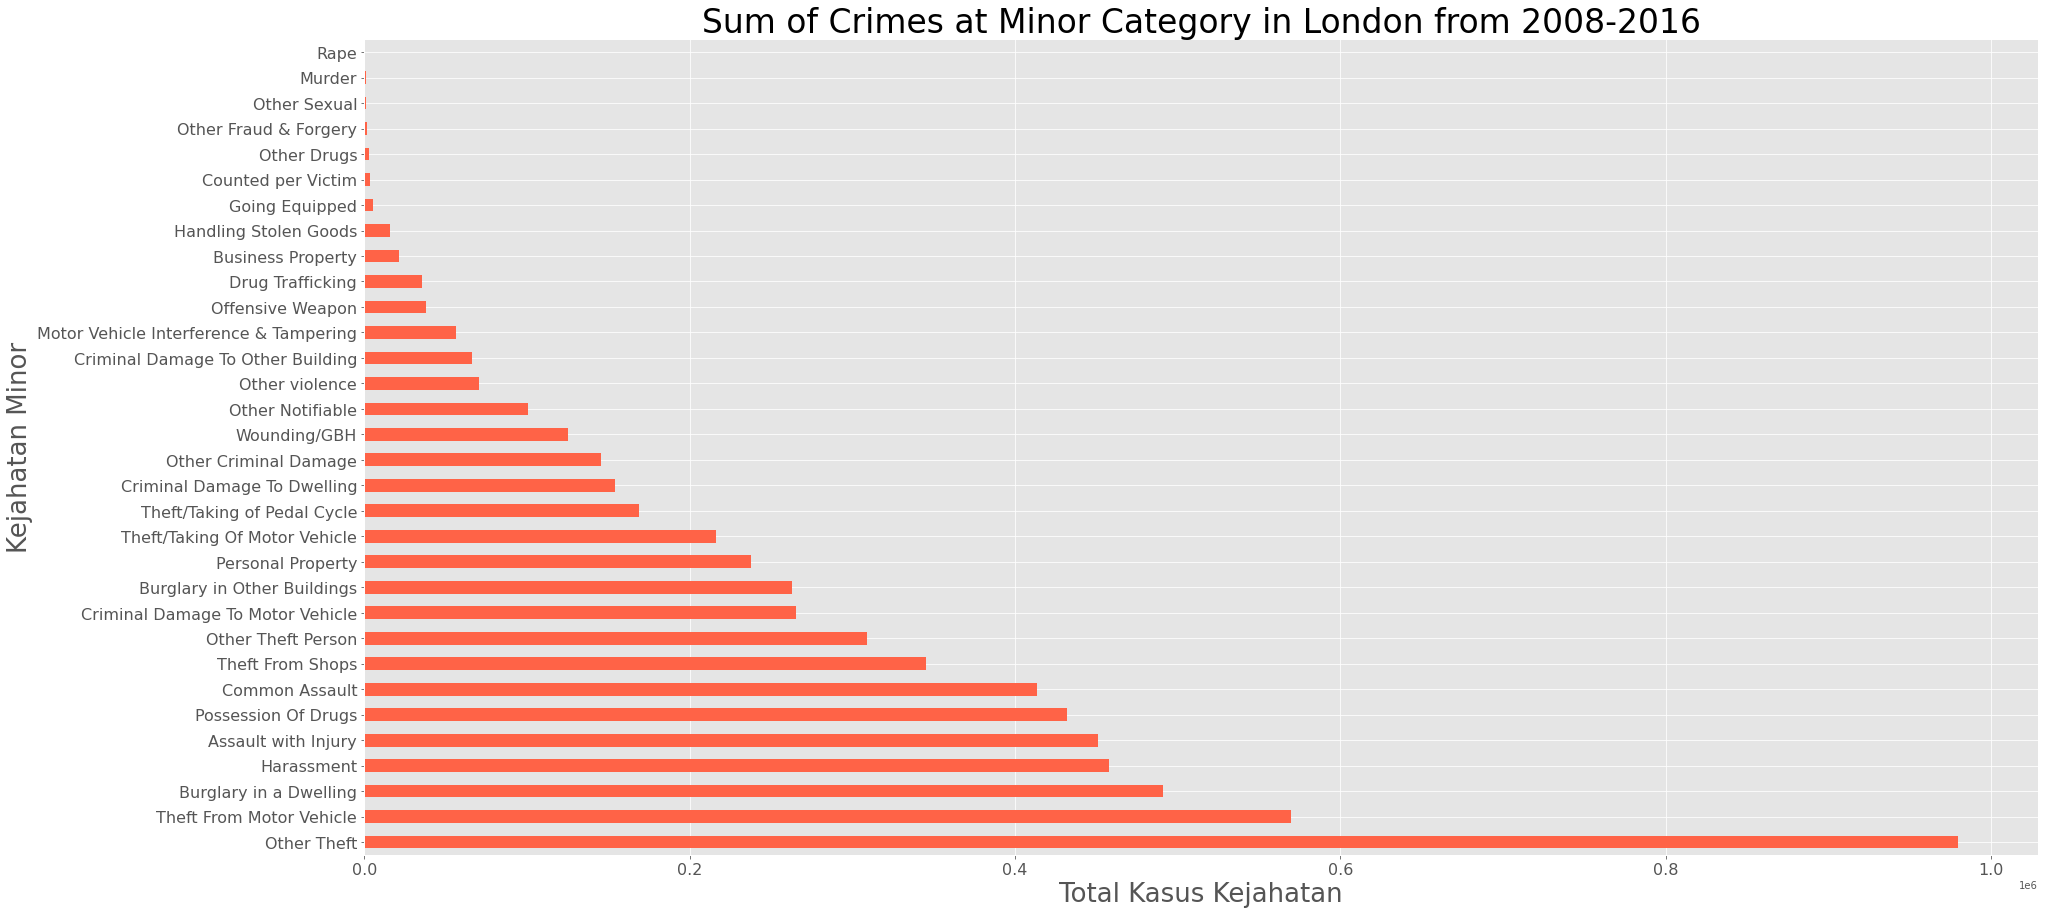

In [99]:
df_minorctg_pertahun['Value'].plot(kind="barh", figsize=(30,15), color='tomato')

plt.title("Sum of Crimes at Minor Category in London from 2008-2016", 
          fontsize=33)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Total Kasus Kejahatan', fontsize=26)
plt.ylabel('Kejahatan Minor', fontsize=26)
plt.show()

**Kesimpulan:** Berdasarkan visualisasi bar chart, dapat diketahui bahwa *Other Theft, Theft From Motor Vehicle, dan Burglary in a Dwelling* menjadi tiga kategori kejahatan minor yang mempunyai total kasus kejahatan dengan persentase tertinggi dari tahun 2008 - 2016. 

### d) Pie Chart
***
Pada sesi ini saya akan membuat visualisasi menggunakan pie chart yaitu grafik statistik berbentuk diagram lingkaran yang dibagi menjadi beberapa irisan dan masing-masing luasnya bergantung pada proporsi kuantitas atau numerik dari data yang kita miliki.

In [100]:
# Groupby dataframe berdasarkan Major Category
df_majorctg = df_lcd.groupby('Major Category', axis=0).sum()
df_majorctg

,Value,Year,Month
Major Category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


##### **Question:**
Bagaimana persentase kejahatan major yang terjadi di wilayah London dari tahun 2008 - 2016?

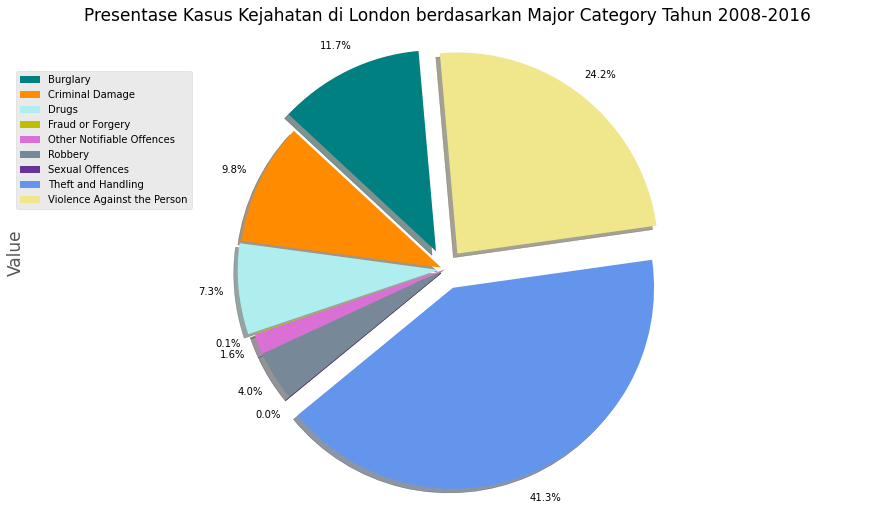

In [132]:
# To offset each wedge
explode_list = [0.1, 0.02, 0.03, 0, 0, 0, 0, 0.1, 0.1]

# Graded-Funtion Begin
df_majorctg['Value'].plot(kind='pie',
                       figsize=(15,9),
                       autopct='%1.1f%%',
                       startangle=95,
                       shadow=True,
                       labels=None, # turn off labels on pie chart
                       explode=explode_list,
                       pctdistance=1.14, # the ratio between the center of each pie slice
                       colors=['teal', 'darkorange', 'paleturquoise', 'y', 'orchid', 'lightslategray', 'rebeccapurple', 'cornflowerblue', 'khaki'])

# Scale the title to match pctdistance above
plt.title('Presentase Kasus Kejahatan di London berdasarkan Major Category Tahun 2008-2016', y=1, x=0.5, fontsize=17)
plt.ylabel('Value', fontsize=17, y=0.54)
plt.axis('equal')

# Add Legend
plt.legend(labels=df_majorctg.index.values, loc='upper right', bbox_to_anchor=(0.2,0.92))

plt.show()

**Kesimpulan:** <br>
Berdasarkan visualisasi pie chart diatas, maka dapat diketahui bahwa presentase kasus kejahatan kategori mayor yang terjadi di wilayah London pada tahun 2008 - 2016 adalah sebagai berikut: <br>
*Theft and Handling* memiliki presentase total kasus tertinggi berdasarkan major category dengan jumlah kasus sebesar **41.3%**. <br>
*Sexual Offences* memiliki presentase total kasus terkecil berdasarkan major category dengan jumlah kasus sebesar **0.0%**.

### e) Box Plot
***
Pada sesi ini saya akan membuat visualisasi menggunakan box plot yaitu visualisasi data berbentuk box (kotak berbentuk bujur sangkar).

##### **Question:**

Bagaimana representasi statistik dari total kasus kejahatan yang terjadi pada setiap wilayah di kota London tahun 2008-2016?

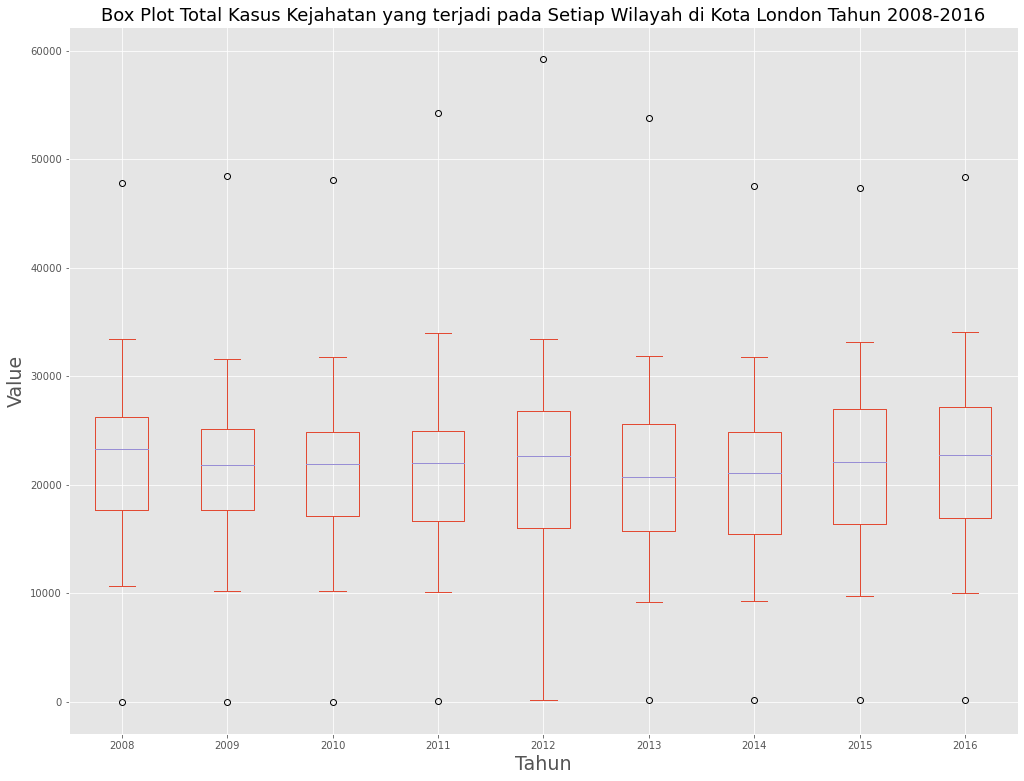

In [134]:
df_wilayah_pertahun[years].plot(kind='box',
                                figsize=(17,13),)

plt.xlabel('Tahun', fontsize=19)
plt.ylabel('Value', fontsize=19)
plt.title('Box Plot Total Kasus Kejahatan yang terjadi pada Setiap Wilayah di Kota London Tahun 2008-2016',  fontsize=18, y=1)
plt.show()

**Kesimpulan:** <br>
Berdasarkan visualisasi box plot diatas, maka dapat kita ketahui sebagai berikut
1. Grafik tersebut sebenarnya memperjelas visualisasi pada area plot yang sudah dibuat sebelumnya, yaitu pada setiap tahunnya rata-rata total kasus kejahatan yang terjadi pada setiap wilayah di London berada dalam kisaran sekitar **22.000an - 26.000an** kejadian.
2. Interval antara titik data pada total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang kurang lebih mirip atau serupa, kecuali pada tahun 2012. Range total kasus kejahatan pada tahun 2012 terlihat lebih tersebar dibandingkan tahun lainnya.

### f) Scatter Plot
***
Pada bagian ini, saya akan membuat visualisasi data menggunakan scatter plot yaitu tipe grafik yang digunakan untuk menggambarkan suatu data dengan menggunakan koordinat cartesian.

In [136]:
df_scaplot = pd.DataFrame(df_lcd.groupby(['Year'], axis=0).sum())

# Atur ulang indeks untuk dimasukkan kembali sebagai kolom di kerangka data df_scaplot
df_scaplot.reset_index(inplace=True)

df_scaplot

,Year,Value,Month
0,2008,738641,9743214
1,2009,717214,9743214
2,2010,715324,9743214
3,2011,724915,9743214
4,2012,737329,9743214
5,2013,686407,9743214
6,2014,680183,9743214
7,2015,711624,9743214
8,2016,736121,9743214


##### **Question:**
Bagaimana trend kasus kejahatan di london pada tahun 2008 hingga 2016 ?

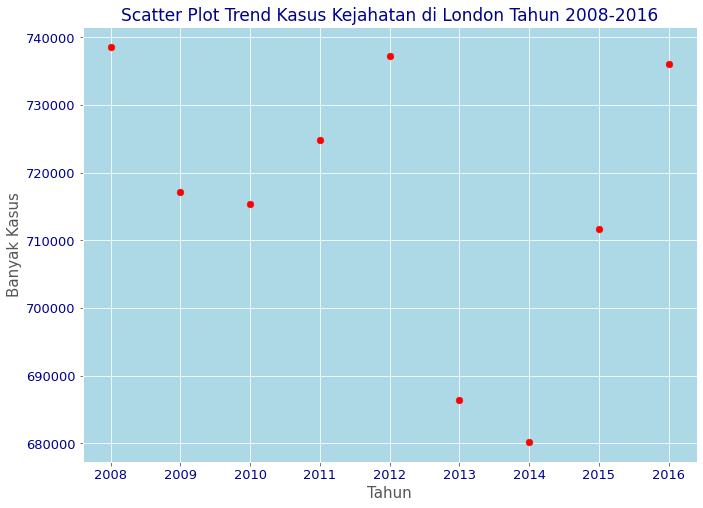

In [141]:
ax = df_scaplot.plot(kind='scatter', x='Year', y='Value', s=45,
                     figsize=(11,8), color='r')
# setting latar biru muda
ax.set_facecolor('lightblue')

# atur scatter plot
plt.title('Scatter Plot Trend Kasus Kejahatan di London Tahun 2008-2016', color= 'darkblue', fontsize=17, y=1)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Banyak Kasus', fontsize=15)
plt.xticks(color='darkblue', fontsize=13)
plt.yticks(color='darkblue', fontsize=13)

plt.show()

**Kesimpulan:** Berdasarkan scatter plot diatas mengenai trend kasus kejahatan di London tahun 2008 - 2016, dapat diketahui bahwa pada rentang tahun 2008 - 2012 memiliki jumlah kasus yang masih terbilang tinggi yaitu dengan total kasus sekitar antara angka **710.000 hingga 740.000**. Kemudian pada tahun berikutnya yaitu 2013 dan 2014, jumlah kasus mengalami penurunan yang sangat jauh rentangnya dari tahun sebelumnya yaitu berada **dibawah angka 690.000**. Namun, dapat kita lihat pada tahun 2015 dan 2016 jumlah kasus kembali mengalami kenaikan yang sangat tinggi seperti angka sebelumnya yaitu **diatas 710.000**.

### g) Word Clouds
***
Pada bagian ini, saya akan membuat visualisasi data menggunakan word clouds yaitu salah satu metode untuk menampilkan data teks secara visual. Grafik ini populer dalam text mining karena mudah dipahami.

In [140]:
freq_majorctg = df_lcd['Major Category']
freq_majorctg

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: Major Category, Length: 13490604, dtype: object

In [44]:
freq_majorctg = freq_majorctg.to_csv("D:\Desktop\DATA SCIENCE MSIB 3 (SYA)\PYTN_Assgn_1_10_Syaima Radestya/major_crime.txt", header=None, index=None, sep=' ', mode='a')

In [35]:
major_crime = open('major_crime.txt', 'r').read()

##### **Question:**

Bagaimana tampilan word cloud untuk kejahatan mayor?

In [36]:
# import package and set stopwords
from wordcloud import WordCloud, STOPWORDS

In [37]:
# set untuk menghapus stopwords yang terlalu over
stopwords = set(STOPWORDS)

In [38]:
# inisiasi wordcloud
majorctg_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate wordcloud
majorctg_wc.generate(major_crime)

(-0.5, 399.5, 199.5, -0.5)

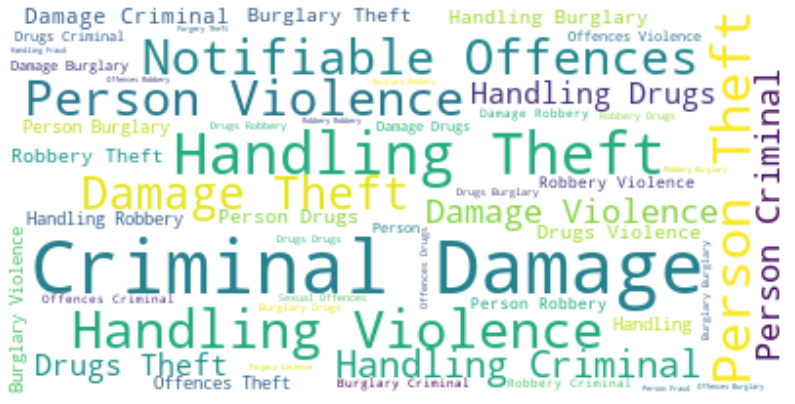

In [39]:
# tampilkan wordcloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(majorctg_wc, interpolation='bilinear');
plt.axis('off')

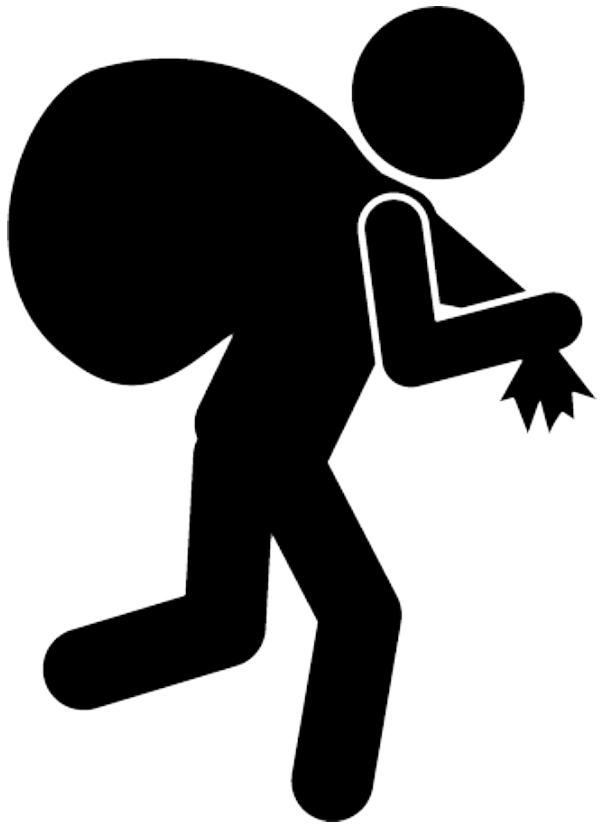

In [142]:
# Masking
from PIL import Image
crime_png = np.array(Image.open('thiefbnw.png'))

fig = plt.figure()
fig.set_figwidth(11)
fig.set_figheight(15)

plt.imshow(crime_png, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

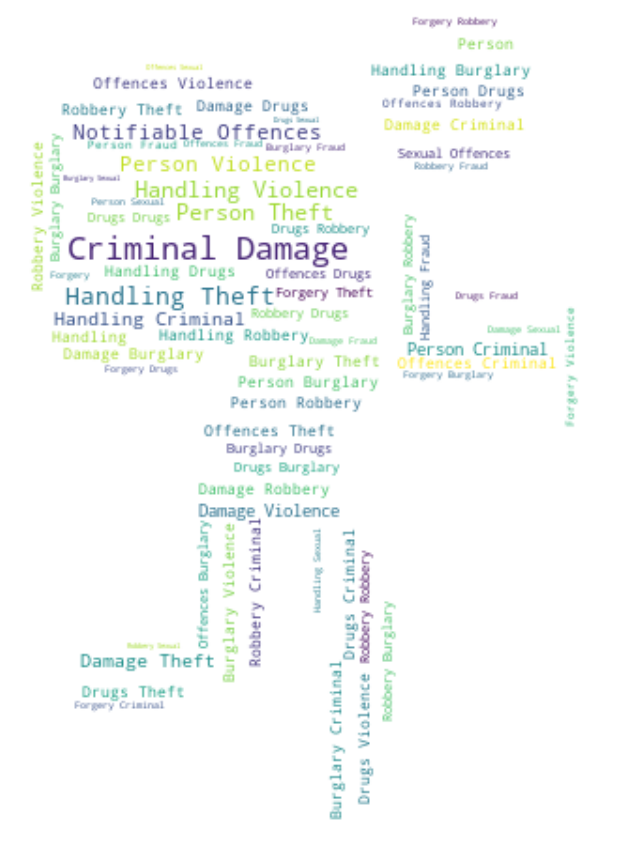

In [145]:
# inisiasi wordcloud
majorctg_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=2000,
    mask=crime_png
)

# generate wordcloud
majorctg_wc.generate(major_crime)

fig = plt.figure()
fig.set_figwidth(11)
fig.set_figheight(16)

plt.imshow(majorctg_wc, interpolation='bilinear');
plt.axis('off');

**Kesimpulan:** huruf di dalam word cloud tersebut dibuat berdasarkan jumlah major category kasus kejahatan di London. Saya juga membuat masking pada hasil word cloud tersebut dengan menggunakan gambar yang sudah saya siapkan. Dari hasil tersebut, dapat kita ketahui berdasarkan wordcloud pada jumlah major category, kasus kejahatan di London yang paling mendominasi yaitu diantaranya *Criminal Damage, Handling Theft, Handling Violance, Person Theft, Person Violance, Notifiable Offences, dan Damage Theft.*

### h) Folium Maps
***
Using Folium with Python is a great way to get started with mapping geospatial data.

##### **Question:**

1. Bagaimana Visualisasi letak atau peta di wilayah London dengan memanfaatkan folium?
2. Bagaimana Visualisasi letak atau peta dari kota yang berada di negara United Kingdom?

### Answer Question 1
***
Visualisasi letak atau peta di wilayah London dengan memanfaatkan folium

In [146]:
# Limit data hanya 100 data teratas
limit = 100
df_lct = df_lcd.iloc[0:limit, :]

# cek shape setelah mengurangi computational cost
df_lct.shape

(100, 7)

In [147]:
# London latitude and longitude values
latitude = 51.509865
longitude = -0.118092

# create map & display it
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display the map of london
london_map

**Kesimpulan:** pada hasil diatas, dapat dilihat saya mendapatkan hasil maps berupa letak pada wilayah London dengan menetukan Latitude dan Longitude menggunakan package folium. Dikarenakan pada dataset London Crime Data tidak tersedia latitude dan Longitude untuk masing-masing wilayah atau borough pada kasus kejahatan di london, maka saya tidak bisa membuat marker (tanda) pada maps untuk wilayah kasus kejahatan di London. Tetapi sebagai gantinya, saya menambah pertanyaan ke-2 dengan mencoba membuat maps berisi letak kota yang berada di negara United Kingdom 

### Answer Question 2
***
Visualisasi letak atau peta Kota yang berada di negara United Kingdom. Data tersebut saya dapatkan dari *simplemaps.com*

In [148]:
# open data
df_uk = pd.read_csv("unitedkingdom.csv")

In [149]:
# limit data hanya 100 teratas
limit = 100
df_uk = df_uk.iloc[:limit, :]
df_uk.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,10979000,8825001
1,Birmingham,52.4800,-1.9025,United Kingdom,GB,Birmingham,NaN,2897303,1137100
2,Manchester,53.4794,-2.2453,United Kingdom,GB,Manchester,NaN,2705000,547627
3,Leeds,53.7997,-1.5492,United Kingdom,GB,Leeds,NaN,1901934,789194
4,Newcastle,55.0077,-1.6578,United Kingdom,GB,Newcastle upon Tyne,NaN,1650000,879996


In [150]:
df_uk.shape

(100, 9)

In [151]:
# inisiasi fitur grup
ukmap = folium.map.FeatureGroup()

# looping ke dataset untuk long dan lat nya
for lat, lng, in zip(df_uk.lat, df_uk.lng):
    ukmap.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )

latitudes = list(df_uk.lat)
longitudes = list(df_uk.lng)
labels = list(df_uk.city)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(london_map)

london_map.add_child(ukmap)

In [152]:
from folium import plugins

ukmap = folium.Map(location=[latitude, longitude], zoom_start=8)

unitedkingdom = plugins.MarkerCluster().add_to(ukmap)

for lat, lng,label in zip(df_uk.lat, df_uk.lng, df_uk.city):
    folium.CircleMarker(
            [lat, lng],
            popup=label,
            icon=None
    ).add_to(unitedkingdom)

ukmap

## 4. Overall Analysis
***
Dengan melakukan berbagai percobaan pada dataset diantaranya yaitu implementasi area plot, histogram, bar chart, pie chart, box plot, scatter plot, word clouds, serta membuat maps dengan folium, saya menjadi lebih memahami informasi dataset yang berisi tentang persebaran kasus kejahatan di wilayah London dari tahun 2008 - 2016. Untuk kesimpulan dan analisis yang sudah saya lakukan diantaranya: <br>
1. Pada tahap preprocessing dataset sebelum dilakukan visualisasi data, pada hasil pengujian nilai unik untuk setiap kolom bertipe string dan setiap kolom bertipe integer ternyata sudah terisi dengan nilai yang sesuai dan tidak ditemukan anomali tipe data pada setiap kolom tersebut. Jadi, pada tahap pre-processing tidak ditemukan adanya nilai null pada dataframe.
2. Berdasarkan hasil dari area plot, dapat diketahui bahwa *Westminster menjadi wilayah dengan total kasus kejahatan tertinggi* dari tahun 2008 - 2016. 
3. Berdasarkan visualisasi menggunakan histogram, kisaran kasus kejahatan yang paling tinggi pada tahun 2015 ada di kisaran 19.049 - 23.773 yang dimana terjadi pada lebih dari 10 jumlah wilayah di London. jumlah kasus paling sedikit pada tahun 2015 yaitu dengan total 151 kasus, dan jumlah kasus terbesar pada tahun 2015 yaitu dengan total 47.395 kasus.
4. Berdasarkan visualisasi Bar chart, dapat diketahui bahwa *Other Theft, Theft From Motor Vehicle, dan Burglary in a Dwelling* menjadi tiga kategori kejahatan minor yang mempunyai total kasus kejahatan dengan persentase tertinggi dari tahun 2008 - 2016. 
5. Berdasarkan visualisasi pie chart, maka dapat diketahui bahwa kasus *Theft and Handling* memiliki presentase total kasus tertinggi berdasarkan major category dengan jumlah kasus sebesar **41.3%**, sedangkan *Sexual Offences* memiliki presentase total kasus terkecil berdasarkan major category dengan jumlah kasus sebesar **0.0%**.
6. Berdasarkan visualisasi box plot, maka dapat kita ketahui bahwa setiap tahunnya rata-rata total kasus kejahatan yang terjadi pada setiap wilayah di London berada dalam kisaran sekitar **22.000an - 26.000an** kejadian. Range total kasus kejahatan pada tahun 2012 terlihat lebih tersebar dibandingkan tahun lainnya.
7. Berdasarkan visualisasi scatter plot trend kasus kejahatan di London. Dapat diketahui bahwa, pada rentang tahun 2008 - 2012 memiliki jumlah kasus yang masih terbilang tinggi yaitu dengan total kasus sekitar antara angka 710.000-740.000. Kemudian pada tahun berikutnya yaitu 2013 dan 2014, jumlah kasus mengalami penurunan yang jauh rentangnya dari tahun sebelumnya yaitu berada di bawah angka 690.000. Pada tahun 2015 dan 2016 jumlah kasus kembali mengalami kenaikan yang tinggi seperti angka sebelumnya yaitu diatas 710.000.
8. Dari hasil visualisasi word clouds, dapat kita ketahui jika berdasarkan wordcloud pada jumlah major category, kasus kejahatan di London yang paling mendominasi yaitu diantaranya *Criminal Damage, Handling Theft, Handling Violance, Person Theft, Person Violance, Notifiable Offence, dan Damage Theft.*
9. Membuat visualisasi maps london serta visualisasi letak kota yang berada di negara United Kingdom dengan menggunakan packages folium maps

Jadi, kita dapat menggunakan visualisasi data untuk mempermudah penyampaian informasi secara efektif, karena arti dari visualisasi data yaitu teknik mengambil informasi dari data ke dalam bentuk visual yang bisa dilihat oleh mata, seperti bagan, grafik, dan peta. Visualisasi data juga dibuat untuk memahami data yang besar atau kecil dengan mudah. Maka dari itu, dengan menggunakan visualisasi data, kita bisa membuat analisis kesimpulan dataset kita menjadi lebih rapi dan simpel.